# David Silver
* https://www.youtube.com/playlist?list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ
* http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html

## [Lecture 1](https://www.youtube.com/watch?v=2pWv7GOvuf0) [Intro](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/intro_RL.pdf)
* Each step, agent ...
  - execute action $A_t$
  - receives observation $O_t$ and reward $R_t$
* History $H_t\equiv\left\{O_t,R_t,A_t\right\}$
* *States*
  - envirnoment state $S_t^e=f(H_T)$ the information environment used to pick next observation/reward (independent of past history)
  - agent state $S_t^a=f(H_T)$ internal information used by agent to decide what to do next
* State is **Markov** iff independent of the past given present. Examples:
  - environment state $S_t^e$
  - full history $H_t$
* **Full observability**/**Markov decision process** $O_t=S_t^a=S_t^e$
* **Partial observability** $S_t^a\neq S_t^e$. Agent choose how to construct $S_t^a$, e.g.
  - $S_t^a=H_t$
  - Beliefs, i.e. a probability distribution of possible environment state
  - RNN, i.e. vector state via training $S_t^a=\sigma\left[{\rm Dense}\left(S_{t-1}^a,O_t\right)\right]$
* *Components of an agent*
  - **Policy**: action given state, either deterministic $a=\pi(s)$ or stochastic $\pi(a|s)$
  - **Value function**: prediction of future rewards (given the current policy) to evalute the favorability of a state: $v_\pi(s)=E\left[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...|S_t\right]$
  - **Model** (optional): predict the next state and next reward given current state and action
  ${\cal P}=p(S_{t+1}|S_t,A_t)$, ${\cal R}=p(R_{t+1}|S_t,A_t)$
* *Categorization of agent*
  * based on existence of value function and policy
    - **Value based**: has value function, on which policy is implied from
    - **Policy based**: has policy but no value function
    - **Actor critic**: has explicit value function and policy
  * based on existence of a model
    - **Model free**: based on policy/value function, without trying to figure out how the environment works
    - **Model based**
* Problems to be tackled:
    * RL = **Learning** (unknown environment/rules, figure out policy through interaction) + **planning** (known env/rules, figure out best policy)
    * Learning = **Exploration** + **exploitation**
    * Planning = **Prediction** (evaluate future given policy) + **control** (find the best policy, i.e. need the prediction on all policies)

## [Lecture 2](https://www.youtube.com/watch?v=lfHX2hHRMVQ) [Markov Decision Processes](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MDP.pdf)
Model for the agent/environment

* **Transition probability** ${\cal P_{ss'}}\equiv p(S_{t+1}=s'|S_t=s)=p(S_{t+1}|S_1...S_t)$ (2nd by definition)

* **Markov Process** $\left<{\cal S,P}\right>$ is specificed by the set of states ${\cal S}$ and transition probability ${\cal P}$

* **Markov Reward Process** $\left<{\cal S,P,R,\gamma}\right>$ is a markov process with (expected) rewards $R_s=\mathbb{E}(R_{t+1}|S_t=s)$ and discount factor $\gamma$
  - The goal (at each time step) is the maximize the return $G_t=\sum_{k=0}^\infty \gamma^k R_{t+k+1}$
  - $\gamma=0$ is myopic, $\gamma=1$ is far-sighted
  - Having discount factor means we have an imperfect model (also, mathematically convenient and avoids infinity if there're infinite loops)
  * **Value function of MRP** $v(s)=\mathbb{E}(G_t|S_t=s)$ is the expected total rewards (i.e. return) if we start off at a certain state
  * **Bellman Expectation Equation for MRP** decomposes value function's $G_t$ to immediate reward $R_{t+1}$ and the discounted value at the next step $v(s)=\mathbb{E}\left[R_{t+1}+\gamma v(S_{t+1})|S_t=s\right]$
    - use transition matrix to evalute the next state: $v(s)={\cal R}_s+\gamma \sum_{s'}{\cal P}_{ss'}v(s')$
    - cast everything to vectors/matrices, $v={\cal R}+\gamma{\cal P}v \implies v=\left(I-\gamma {\cal P}\right)^{-1}{\cal R}$
    - not practically for direct usage as O(n^3)
* **Markov Decision Process** $\left<{\cal S,A,P,R,\gamma}\right>$ adds actions $\cal A$ to a markov reward process
  - Transition matrix $\cal P_{ss'}^a$ depends on the action the agent take
  - Rewards $\cal R_s^a$ also depends on the action the agent take
  - **Policy** $\pi(a|s)=p(A_t=a|S_t=s)$ completely defines the behavior (actions) of the agent (only consider stationary policy i.e. independent of time)
  - Given policy which governs the action, $\left<{\cal S,P^\pi,R^\pi,\gamma}\right>$ reduces to a markov reward process, where $P^\pi=\sum_a \pi(a|s){\cal P}_{ss'}^a$
  - **State-value function of MDP** $v_\pi(s)=\mathbb{E}_\pi(G_t|S_t=s)$ is the expected return starting off at state $s$ and following policy $\pi$
  - **Action-value function of MDP** $q_\pi(s,a)=\mathbb{E}_\pi(G_t|S_t=s,A_t=a)$ is the expected return starting off at state $s$, *taking action $a$*, and following policy $\pi$
  - **Bellman Expectation Equation for MDP** still true: $v_\pi(s)=\mathbb{E}_\pi\left[R_{t+1}+\gamma v_\pi(S_{t+1})|S_t=s\right]$  and $q_\pi(s,a)=\mathbb{E}_\pi\left[R_{t+1}+\gamma q_\pi(S_{t+1},A_{t+1})|S_t=s,A_t=a\right]$
    - Condition on next action: $v_\pi(s)=\sum_a\pi(a|s)q_\pi(s,a)$
    - Condition on the state after the action about to take:  $q_\pi(s,a)={\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_\pi(s')$
    - Combining for $v$: $v_\pi(s)=\sum_a \pi(a|s) \left({\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_\pi(s')\right)$
    - Combining for $q$: $q_\pi(s,a)={\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a \sum_{a'}\pi(a'|s')q_\pi(s',a')$
    - One way to solve is to cast to MRP and then use $v_\pi={\cal R^\pi}+\gamma{\cal P^\pi}v_\pi \implies v_\pi=\left(I-\gamma {\cal P^\pi}\right)^{-1}{\cal R^\pi}$
  - **Optimal state-value function** $v_*(s)=\max_\pi v_\pi(s)$<br/>
    **Optimal action-value function** $q_*(s,a)=\max_\pi q_\pi(s,a)$ (the goal is to solve for this -- directly informs the correct policy to follow)
* **Optimality** of policy in MDP
  - **Ordering** of policy is defined as $\pi\geq\pi'$ if $v_\pi(s)\geq v_{\pi'}(s) \forall s$
  - Theorem:
    - there is at least a deterministic optimal policy $\pi_*\geq\pi, \forall \pi$
    - if there are multiple optimal policies, they all achieve the same optimal $v$ and $q$: $v_{\pi_*}(s)=v_*(s)$ amd $q_{\pi_*}(s,a)=q_*(s,a)$
    - if $q_*$ is known, $\pi_*(a|s)$ is to follow ${\rm argmax}_a q_*(s,a)$
* **Bellman Optimality Equations**  in MDP
  - $v_*(s)=\max_a q_*(s,a)$
  - $q_*(s,a)={\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_*(s')$ just average over the possible states that the environment state will go into
  - Combining for $v$...
  - Combining for $q$...
  - Nonlinear due to max function
  - No closed form in general, use iterative methods:  Value Iteration, Policy Iteration, Q-learning, Sarsa
* **Extensions**
  - Infinite (# states/action spaces) continuous (states/action spaces or time)
  - Partially observable MDP: add observations $\cal O$ and observation function $p(o|s,a)$ to problem definition
  

## [Lecture 3](https://www.youtube.com/watch?v=Nd1-UUMVfz4) [Planning by Dynamic Programming](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/DP.pdf)
Given a *known* MDP, find best policy
* **Dynamic programming**: a general method to solve problems with 
  - Optimal substructure -- combination of optimal subsolution is the optimal solution of the main problem
  - Overlapping subproblem -- subproblems appear again and again so you can cache the solution
* **Policy Evaluation**: evaluate $v_\pi$ given a $\pi$, via iterations ($k$ as the index)
  - **(a)synchronus backups** -- whether to update $v_k(s)$ for all states together at once (it matters as they depend on each other)
  - iterate using Bellman equation $v_{k+1}(s)=\sum_a \pi(a|s) \left({\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_k(s')\right)$
  - simple example: walking to NW or SE corner of a grid, each step rewards -1. Policy is equal prob for all directions. At each step, for each grid point (except NW and SE whose $v_\pi$ is 0), average all the $v$ of the neighbors and add -1 to it. Iterate to convergence
* **Policy Iteration**: After evaluating $v_\pi$, modify policy to act greedily w.r.t. $v_\pi$ i.e. maximize the expected reward+value on the next timestep, *based on Bellman Expectation equation* $v_\pi(s)=\mathbb{E}_\pi\left[R_{t+1}+\gamma v_\pi(S_{t+1})|S_t=s\right]$ (modify $\pi$ to maximize $v$)
  - Iterate: $v=v_\pi \Longleftrightarrow \pi={\rm greedy}(v)$, converges to $\{v_*, \pi_*\}$
  - For deterministic policy $\left[a=\pi(s)\right]$, the iteration step for $\pi$ is $\pi'(s)={\rm argmax}_aq_\pi(s,a)$
    - can be proven by showing $q_\pi$ improves by following this for one-step, then two-step, and so on.
    - *if* iteration stops, automatically satisfies Bellman equation, so $v_\pi=v_*$
  - **Modified Policy Iteration**: way earlier than convergence of the value function, optimal policy could be found. 
    - 3 iterations of value function are sufficient to give correct policy
    - if stop at 1 iteration, equivalent to value iteration
* **Value Iteration**: iterate by *Bellman optimality equation* $v_*(s)=\max_a \left[{\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_*(s')\right]$ (start with random guess and get new lhs each time)
  - aims at finding $v_*$ (value of optimal policy);  the value function at intermedate iteration steps $v_k(s)$ does not corresponds to any policy
  - synchronous 'backup': at each step, for all states, update $v_{k+1}(s)$ from $v_k(s)$
  - taking $\max_a$ equivalent to formulating the correct policy. i.e. equiv to policy iteration that do only 1 iteration in finding $v$
* **Asynchronous update**:
  - Complexity for synchronous update for $m$ actions and $n$ states: ${\cal O}(mn^2)$ per iteration
  - asynch: updates $v(s)$ for each state individually; i.e. does not need to update all $v(s)$ simultaneously
  - Guaranteed to converge if all states are selected
  - Flavors:
      - **in-place DP**: update each stat immediately in any order
      - **prioritised sweeping**: update states that were changing the most, i.e. largest $\left|\max_a\left[{\cal R}_s^a+\gamma\sum_{s'}{\cal P}_{ss'}^a v_*(s')\right]-v(s)\right|$
      - **real-tiem DP**: use real agent to run through the problem, and update states around those visited by the agent
* **Sample backups**: using sample rewards and transitions instead of the provided (or unavailable) rewards $\cal R$ and transition matrix $\cal P$

## [Lecture 4](https://www.youtube.com/watch?v=PnHCvfgC_ZA) [Model-Free Prediction](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/MC-TD.pdf)
*Estimate* value function of policies for an *unknown* MDP (knows rewards but not transition probabilities)
* **Monte Carlo**: learn $v_\pi$ from *complete* episode under policy $\pi$
  - only for episodic MDPs i.e. all episodes must terminate
  - 1 episode = full history $H=S_1,A_1,R_2,S_2,A_2,...S_k$
  - compute $v_\pi(s)=\mathbb{E}_\pi[G_t|S_t=s]$, where $G_t=R_{t+1}+\gamma R_{t+2}+...+\gamma^{T-1} R_T$, by *empirically* taking the mean for expectation
  - either **first-time** or **every-time**: whether to use the values obtained from 2+ times of visiting a state (in each episode). Both are valid
  - like SGD, $V(S_t)\leftarrow V(S_t)+\alpha \left[G_t-V(S_t)\right]$
* **Temporal Difference TD(0)**: learns from *incomplete episodes* via *bootstrapping*
  - update by $V(S_t)\leftarrow V(S_t)+\alpha \left[R_{t+1}+\gamma V(S_{t+1})-V(S_t)\right]$, ie not computing full return $G_t$ by waiting full episode, but use one-step look-ahead with current guess for next-state's value
    - **TD target** $\equiv R_{t+1}+\gamma V(S_{t+1})$
    - **TD error** $\delta_t\equiv R_{t+1}+\gamma V(S_{t+1})-V(S_t)$
* Comparing MC vs TD:
  - MC needs full episodes so cannot handle continuing (non-terminating) environments. TD can
  - MC estimate for $v_\pi$ is unbiased but high variance (because all subsequent steps have noise), and not sensitive to initial value. TD(0) is biased, low-variance, and sensitive to initial guesses (because the update uses guess for $V(S_{t+1})$ to update $V(S_{t})$. TD(0) is more efficient
  - For a finite batch of episodes, repeatedly running MC/TD with the batch would yield:
    - MC yields value functions with minimum MSE: $\sum_{kt}\left[G_t^k-V(s_t^k)\right]^2$
    - TD(0) constructs $\cal P$ and $\cal R$ for a MDP $\left<{\cal S,A,P,R,\gamma}\right>$ ($\cal S,A,\gamma$ are given by the episode) that best fits the data (maximal likelihood)
  - TD exploits Markov property (it effectively builds an intrinsic MDP) while MC does not. MC is more effective for non-Markov environment
  - TD uses bootstrapping (using estimate to update estimate); MC does not. [both MC and TD use sampling, DP (dynamic programming) does not] 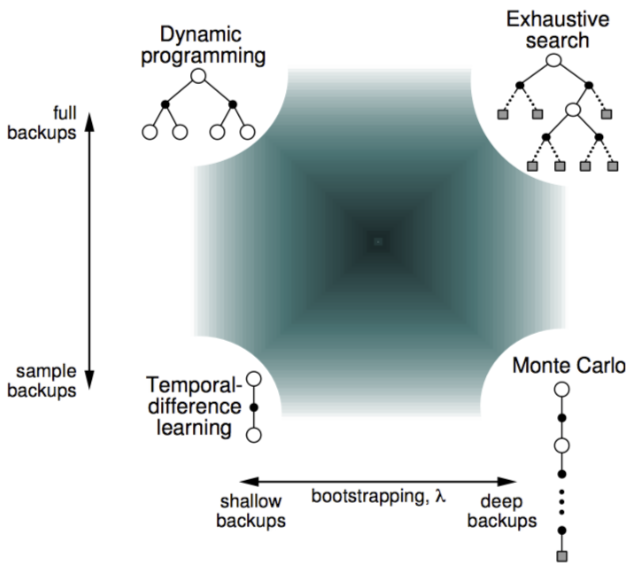
* **TD($\lambda$)**
  - Motivation: in principle the TD target could also use the estimated return with more than one step, i.e. $G_t^{(n)}=R_{t+1}+\gamma R_{t+2}+...+\gamma^nV(S_t+n)$. In practice the optimal step size to use varies with problem size. We combine $G_t^{(n)}$ for all n using a geometric average...
  - $G_t(\lambda)=(1-\lambda)\sum_{n=1}^\infty\lambda^{n-1}G_t^{(n)}$. i.e. weights are $1-\lambda$, $(1-\lambda)\lambda$,..., $\lambda^{T-t-1}$ (for final return)
  - **Forward-view** TD($\lambda$): since it involves G at future steps, direct implementation would require complete episodes for an update, like MC.
  - **Backward-view** TD($\lambda$) algorithm allows for online learning (update) of value functions without waiting for the episode to end:
    - Define **eligibility traces** for each state to track the recentness of visit to the state: $E_t(s)=\gamma\lambda E_{t-1}(s)+\mathbb{1}(S_t=s)$ where $E_0(s)=0$
    - At each step, for *all* states, update with $V(s)\leftarrow V(s)+\alpha E_t(s) \delta_t$, where $\delta_t=R_{t+1}+\gamma V(S_{t+1})-V(S_t)$
  - Consider limit $\lambda=0$: $E_t(s)=\mathbb{1}(S_t=s)$, $V(s)\leftarrow V(s)+\alpha E_t(s) \delta_t$ equiv. to $V(S_t)\leftarrow V(S_t)+\alpha \delta_t$, i.e. TD(0)
  - Consider limit $\lambda=1$: after a full episode, the updates made are equiv. to every-time MC if updates are **offline**
  - **offline** updates: updates are recorded down during an episode, but does not apply until at the end when all states get updated simultaneously at once
  - **online** updates: updates are applied immediately for each step. With this TD(1) would normally not be equivalent to MC, but with modified version of update scheme(**Exact online TD($\lambda$)**), it is equivalent: 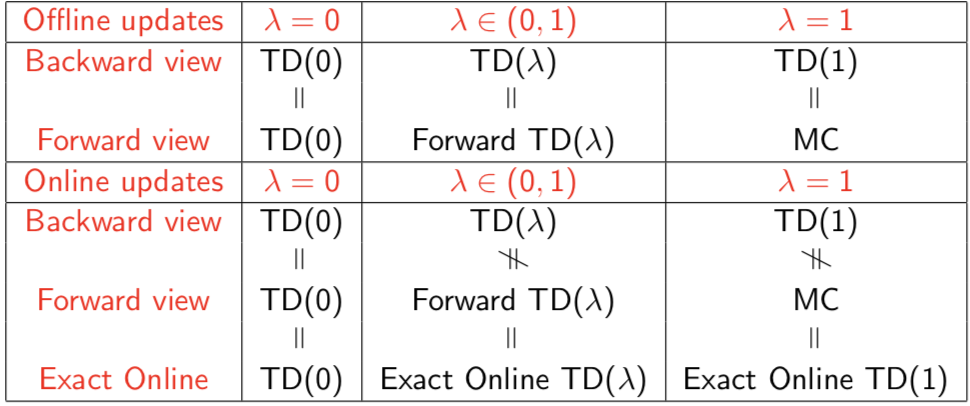

## [Lecture 5](https://www.youtube.com/watch?v=0g4j2k_Ggc4) [Model Free Control](http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/control.pdf)
*Optimize* value function (i.e. policy) for an unknown MDP (knows rewards but not transition probabilities)